## Intoduction

- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

- <a>http://www.amstat.org/publications/jse/v19n3/decock.pdf</a> 

In [ ]:
!mkdir data

In [ ]:
!wget -P data https://raw.githubusercontent.com/ogunlao/HousePricePrediction/master/train.csv

--2021-02-02 12:37:29--  https://raw.githubusercontent.com/ogunlao/HousePricePrediction/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘data/train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.02s   

2021-02-02 12:37:29 (27.8 MB/s) - ‘data/train.csv’ saved [460676/460676]



In [ ]:
path = '/content/data'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# show all df columns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
df_train = pd.read_csv(f"{path}/train.csv", index_col='Id')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
col_to_use = ["YearRemodAdd", "YrSold", "GrLivArea", "Alley", "MSZoning", "BsmtCond", "Street", "OverallQual", "SalePrice"]

df_train = df_train[col_to_use].copy()

In [ ]:
df_train.head(10).T

Id,1,2,3,4,5,6,7,8,9,10
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008
GrLivArea,1710,1262,1786,1717,2198,1362,1694,2090,1774,1077
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
BsmtCond,TA,TA,TA,Gd,TA,TA,TA,TA,TA,TA
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
OverallQual,7,6,7,7,8,5,8,7,7,5
SalePrice,208500,181500,223500,140000,250000,143000,307000,200000,129900,118000


In [ ]:
df_train[df_train["YearRemodAdd"] > df_train["YrSold"]][["YearRemodAdd", "YrSold"]]

,YearRemodAdd,YrSold
Id,,
524,2008,2007


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearRemodAdd  1460 non-null   int64 
 1   YrSold        1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   Alley         91 non-null     object
 4   MSZoning      1460 non-null   object
 5   BsmtCond      1423 non-null   object
 6   Street        1460 non-null   object
 7   OverallQual   1460 non-null   int64 
 8   SalePrice     1460 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 114.1+ KB


## Dealing with Outliers

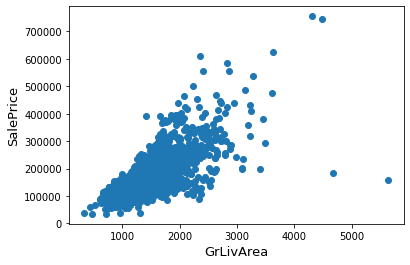

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
#Deleting outliers

df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

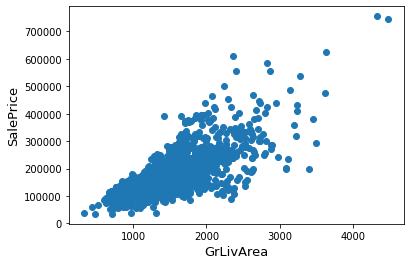

In [ ]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
print("Training Set Shape:", df_train.shape)

Training Set Shape: (1458, 9)


In [ ]:
df_target = df_train['SalePrice'].copy()

## Dealing with missing values


In [ ]:
df_train.isnull().sum().sort_values(ascending = False)

Alley           1367
BsmtCond          37
SalePrice          0
OverallQual        0
Street             0
MSZoning           0
GrLivArea          0
YrSold             0
YearRemodAdd       0
dtype: int64

In [ ]:
# Some lot frontage not given

# Some lot frontage not given
values = {
          "BsmtCond": "None",           
          }

df_train.fillna(value=values, inplace=True)

In [ ]:
del df_train['Alley']

In [ ]:
#check for null values
df_train.isnull().sum().sort_values(ascending = False)

SalePrice       0
OverallQual     0
Street          0
BsmtCond        0
MSZoning        0
GrLivArea       0
YrSold          0
YearRemodAdd    0
dtype: int64

## Feature Engineering

In [ ]:
#Create feature indicating age of house after renovation
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearRemodAdd']

In [ ]:
# Change convert all low ages to zero 
df_train['HouseAge'][df_train['HouseAge'] < 0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train['Street']

Id
1       Pave
2       Pave
3       Pave
4       Pave
5       Pave
        ... 
1456    Pave
1457    Pave
1458    Pave
1459    Pave
1460    Pave
Name: Street, Length: 1458, dtype: object

In [ ]:
# Convert some categorial vatiables to numerical where there is order

    replacement_str = {"Grvl": 1, "Pave": 2}

    df_train = df_train.replace({
                            'Street': replacement_str,
                            })

In [ ]:
df_train["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
# Create new features
# 1* Simplifications of existing features
df_train["SimplOverallQual"] = df_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

In [ ]:
#Divide features into numerical and categorical features

df_train_num = df_train.select_dtypes(include = [np.number])
df_train_num.columns
#df_train_cat = df_train.select_dtypes(include = ['object'])

Index(['YearRemodAdd', 'YrSold', 'GrLivArea', 'Street', 'OverallQual',
       'SalePrice', 'HouseAge', 'SimplOverallQual'],
      dtype='object')

In [ ]:
df_train.shape

(1458, 10)

In [ ]:
# Create feature interactions among numerical variables
num_col_len = len(df_train_num.columns)

for i in range(num_col_len-1):
    col1 = df_train_num.columns[i]
    #for j in range(i+1, num_col_len):
    for j in range(i+1, num_col_len):
        col2 = df_train_num.columns[j]
        df_train[f"{col1}_{col2}"] = df_train[col1]*df_train[col2]

In [ ]:
df_train.shape

(1458, 38)

## LabelEncoding of Categorical Variables

- Decided not to create dummy variables as that would increase the number of features which is at present large 
- 1637 features already without encodings, for 2917 examples.

In [ ]:
df_le = df_train.copy()

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = LabelEncoder()

for i in range(0,df_le.shape[1]):
    if df_le.dtypes[i]=='object':
        df_le[df_le.columns[i]] = le.fit_transform(df_le[df_le.columns[i]])

In [ ]:
# Separate back into training and test set
df_train = df_le.iloc[0:1458, :]
print("Training Set Shape:", df_train.shape)

Training Set Shape: (1458, 38)


In [ ]:
df_train.head()

,YearRemodAdd,YrSold,GrLivArea,MSZoning,BsmtCond,Street,OverallQual,SalePrice,HouseAge,SimplOverallQual,YearRemodAdd_YrSold,YearRemodAdd_GrLivArea,YearRemodAdd_Street,YearRemodAdd_OverallQual,YearRemodAdd_SalePrice,YearRemodAdd_HouseAge,YearRemodAdd_SimplOverallQual,YrSold_GrLivArea,YrSold_Street,YrSold_OverallQual,YrSold_SalePrice,YrSold_HouseAge,YrSold_SimplOverallQual,GrLivArea_Street,GrLivArea_OverallQual,GrLivArea_SalePrice,GrLivArea_HouseAge,GrLivArea_SimplOverallQual,Street_OverallQual,Street_SalePrice,Street_HouseAge,Street_SimplOverallQual,OverallQual_SalePrice,OverallQual_HouseAge,OverallQual_SimplOverallQual,SalePrice_HouseAge,SalePrice_SimplOverallQual,HouseAge_SimplOverallQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2003,2008,1710,3,4,2,7,208500,5,3,4022024,3425130,4006,14021,417625500,10015,6009,3433680,4016,14056,418668000,10040,6024,3420,11970,356535000,8550,5130,14,417000,10,6,1459500,35,21,1042500,625500,15
2,1976,2007,1262,3,4,2,6,181500,31,2,3965832,2493712,3952,11856,358644000,61256,3952,2532834,4014,12042,364270500,62217,4014,2524,7572,229053000,39122,2524,12,363000,62,4,1089000,186,12,5626500,363000,62
3,2002,2008,1786,3,4,2,7,223500,6,3,4020016,3575572,4004,14014,447447000,12012,6006,3586288,4016,14056,448788000,12048,6024,3572,12502,399171000,10716,5358,14,447000,12,6,1564500,42,21,1341000,670500,18
4,1970,2006,1717,3,1,2,7,140000,36,3,3951820,3382490,3940,13790,275800000,70920,5910,3444302,4012,14042,280840000,72216,6018,3434,12019,240380000,61812,5151,14,280000,72,6,980000,252,21,5040000,420000,108
5,2000,2008,2198,3,4,2,8,250000,8,3,4016000,4396000,4000,16000,500000000,16000,6000,4413584,4016,16064,502000000,16064,6024,4396,17584,549500000,17584,6594,16,500000,16,6,2000000,64,24,2000000,750000,24


## Saving the Data

Tried using feather, but got errors of dependencies between pip and anaconda during installation. So I'll use pickle instead

In [ ]:
# Saving to pickle file
df_train.to_pickle("data/house-train.pkl")
df_target.to_pickle("data/house-train-target.pkl")

In [ ]:
# To unpiclke
#df_train = pd.read_pickle("data/house-train.pkl")
#df_test = pd.read_pickle("data/house-test.pkl")
#df_target = pd.read_pickle("data/house-train-target.pkl")

Thank you